In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Assuming you have two folders named 'real_10' and 'real_20' containing respective real note images
folder_real_10 = r'C:\Users\pushpa\Documents\dataset\indian_currency_new\training\10'
folder_real_20 = r'C:\Users\pushpa\Documents\dataset\indian_currency_new\training\20'
#
# Load images and labels
images = []
labels = []

# Load real 10 rupee note images
for filename in os.listdir(folder_real_10):
    img = cv2.imread(os.path.join(folder_real_10, filename))
    if img is not None:
        images.append(img)
        labels.append('10')

# Load real 20 rupee note images
for filename in os.listdir(folder_real_20):
    img = cv2.imread(os.path.join(folder_real_20, filename))
    if img is not None:
        images.append(img)
        labels.append('20')

# Load additional '10' rupee note image
additional_img = cv2.imread('IMG_20230611_190305.jpg')
if additional_img is not None:
    images.append(additional_img)
    labels.append('10')
    
# Load additional '20' rupee note image
additional_img = cv2.imread('IMG_20230710_221512.jpg')
if additional_img is not None:
    images.append(additional_img)
    labels.append('20')

# Convert lists to numpy arrays
images = np.array(images, dtype=object)
labels = np.array(labels)

# Resize images to a common size
image_height = 200
image_width = 200

resized_images = []
for img in images:
    resized_img = cv2.resize(img, (image_width, image_height))
    resized_images.append(resized_img)

images_resized = np.array(resized_images)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_resized, labels, test_size=0.2, random_state=42)

# Convert labels to numeric categorical values
class_labels = np.unique(labels)
num_classes = len(class_labels)
label_to_index = {label: index for index, label in enumerate(class_labels)}

# Convert the labels to numeric categorical values
y_train = to_categorical(np.array([label_to_index[label] for label in y_train]), num_classes)
y_test = to_categorical(np.array([label_to_index[label] for label in y_test]), num_classes)

# Normalize the image data
image_channels = 3
X_train_processed = X_train.reshape(-1, image_height, image_width, image_channels).astype('float32') / 255.0
X_test_processed = X_test.reshape(-1, image_height, image_width, image_channels).astype('float32') / 255.0

# Model construction
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout layer to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_processed, y_train, epochs=30, batch_size=32, validation_data=(X_test_processed, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_processed, y_test)
print("Accuracy:", accuracy)


Epoch 1/30
17/17 [==============================] - 120s 4s/step - loss: 2.5167 - accuracy: 0.5952 - val_loss: 0.5946 - val_accuracy: 0.6912
Epoch 2/30
17/17 [==============================] - 62s 4s/step - loss: 0.5746 - accuracy: 0.6599 - val_loss: 0.5492 - val_accuracy: 0.6838
Epoch 3/30
17/17 [==============================] - 62s 4s/step - loss: 0.5158 - accuracy: 0.6858 - val_loss: 0.5176 - val_accuracy: 0.6765
Epoch 4/30
17/17 [==============================] - 65s 4s/step - loss: 0.4389 - accuracy: 0.7579 - val_loss: 0.4885 - val_accuracy: 0.7426
Epoch 5/30
17/17 [==============================] - 61s 4s/step - loss: 0.3885 - accuracy: 0.8207 - val_loss: 0.4497 - val_accuracy: 0.7647
Epoch 6/30
17/17 [==============================] - 60s 4s/step - loss: 0.3311 - accuracy: 0.8595 - val_loss: 0.4595 - val_accuracy: 0.7426
Epoch 7/30
17/17 [==============================] - 62s 4s/step - loss: 0.3077 - accuracy: 0.8725 - val_loss: 0.4697 - val_accuracy: 0.7206
Epoch 8/30
17/17 [=

In [2]:
#This paper developed a computer vision based approach for Indian paper currency detection.
#In this approach, extract currency feature and develop an own datasets used for the currency detection. 
#By using feature extraction method of front and back side Rs. 200 denomination security feature of Indian currency note. 
#The mainly use ORB (Oriented FAST and Rotated BRIEF) and Brute-Force matcher approach to extract the feature of paper currency,
#so that can more accurately detection the denomination of the banknote both obverse and reverse. Our main contribution is
#through using ORB and BF matcher in OpenCV based, the average accuracy of detection is up to 95.0% and tested this method on
#different denominations of Indian banknote."""

In [3]:
from IPython.display import Image, display

1/1 [==============================] - 1s 752ms/step
Predicted Class Label: 10


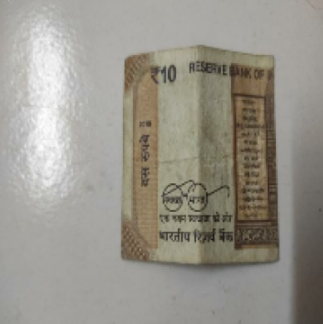

In [4]:
# Path to the input image on your phone
input_image_path = 'Screenshot (782).png'

#IMG_20230614_184057.jpg
# Resize the input image to the desired dimensions
image_height = 200
image_width = 200
image_channels = 3

# Load the input image
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Failed to load the image.")
else:
    # Resize the image
    resized_image = cv2.resize(input_image, (image_width, image_height))

    # Perform further processing on the resized image
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the image
    processed_image = resized_image.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0
    # Make predictions on the input image
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted Class Label:", predicted_class_label)
display(Image(filename=input_image_path))

In [89]:
# Connect to the DroidCam app and capture an image
cap = cv2.VideoCapture(1)  # 0 refers to the default camera on your laptop

In [12]:
classes = {0: '10', 1: '20'}

In [13]:
# Capture and preprocess the image
ret, frame = cap.read()

In [14]:
frame = cv2.resize(frame, (200, 200))
test_image = np.expand_dims(frame, axis=0)
test_image = test_image.astype('float32') / 255.0

In [16]:
# Set the confidence threshold
confidence_threshold = 0.75

In [15]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 269ms/step
Predicted Class: 20


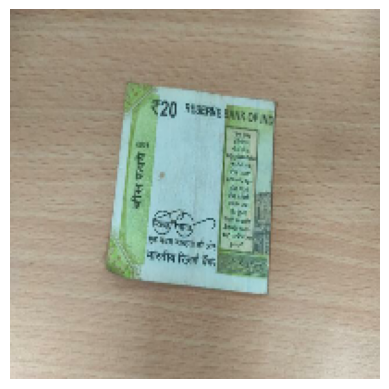

In [17]:
# Use the trained model to make predictions on the captured imag
prediction = model.predict(test_image)
predicted_class = int(round(prediction[0][0]))

# Get the predicted class label or classify as "Wrong Input"
if predicted_class in classes:
    predicted_label = classes[predicted_class]
    confidence = prediction[0][0]
    if confidence < confidence_threshold:
        predicted_label = "Wrong Input"
else:
    predicted_label = "Wrong Input"

# Print the predicted class label
print("Predicted Class:", predicted_label)
# Display the captured image
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [18]:
import scipy.special as sp

1/1 [==============================] - 0s 202ms/step
Predicted Class Label: 10
Confidence Ratio: 0.7310429


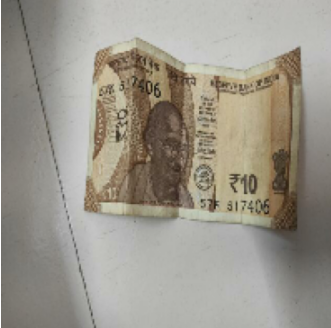

In [19]:
# Path to the input image on your phone
input_image_path = 'Screenshot (790).png'

# Resize the input image to the desired dimensions
image_height = 200
image_width = 200
image_channels = 3

# Load the input image
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Failed to load the image.")
else:
    # Resize the image
    resized_image = cv2.resize(input_image, (image_width, image_height))

    # Perform further processing on the resized image
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the image
    processed_image = resized_image.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0

    # Make predictions on the input image
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label = class_labels[predicted_class_index]

    # Calculate the confidence ratio from predictions
    confidence_ratio = sp.softmax(predictions[0])[predicted_class_index]

    # Print the predicted class label and confidence ratio
    print("Predicted Class Label:", predicted_class_label)
    print("Confidence Ratio:", confidence_ratio)

    # Display the input image
    display(Image(filename=input_image_path))


In [24]:
# Capture and preprocess the image
ret, frame_1 = cap.read()

In [25]:
frame_1 = cv2.resize(frame_1, (200, 200))
test_image_1 = np.expand_dims(frame_1, axis=0)
test_image_1 = test_image_1.astype('float32') / 255.0

In [26]:
# Set the confidence threshold
confidence_threshold_1 = 0.75

1/1 [==============================] - 0s 136ms/step
Predicted Class: 20
Confidence Ratio: 0.9983954


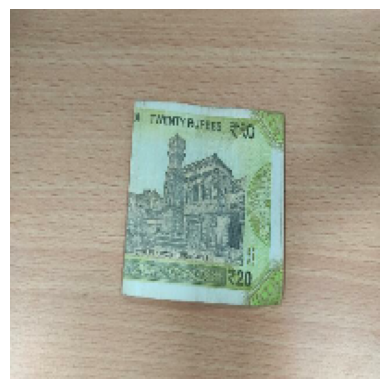

In [27]:
# Use the trained model to make predictions on the captured image
prediction_1 = model.predict(test_image_1)
predicted_class_1 = int(round(prediction_1[0][0]))

# Get the predicted class label or classify as "Wrong Input"
if predicted_class_1 in classes:
    predicted_label_1 = classes[predicted_class_1]
    confidence_1 = prediction_1[0][0]
    if confidence_1 < confidence_threshold_1:
        predicted_label_1 = "Wrong Input"
else:
    predicted_label_1 = "Wrong Input"

# Print the predicted class label
print("Predicted Class:", predicted_label_1)
print("Confidence Ratio:", confidence_1)
# Display the captured image
plt.imshow(cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [104]:
# Capture and preprocess the image
ret, frame_2 = cap.read()

1/1 [==============================] - 0s 133ms/step
Predicted Class Label: 10
Confidence Ratio: 0.7309902


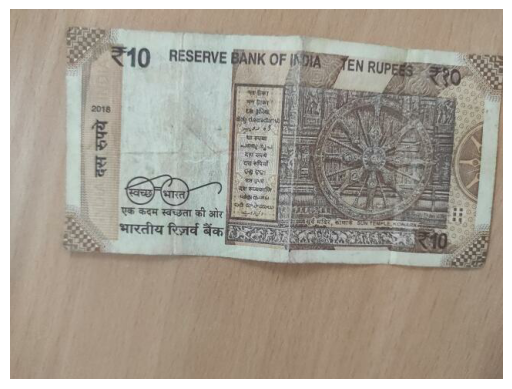

In [105]:
if not ret:
    print("Error: Failed to capture image from the camera.")
else:
    # Resize the captured frame to the desired dimensions
    resized_frame_00 = cv2.resize(frame_2, (image_width, image_height))

    # Perform further processing on the resized frame
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the frame
    processed_frame_00 = resized_frame_00.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0

    # Make predictions on the input frame
    predictions_00 = model.predict(processed_frame_00)
    predicted_class_index_00 = np.argmax(predictions_00[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label_00 = class_labels[predicted_class_index_00]

    # Calculate the confidence ratio from predictions
    confidence_ratio_00 = sp.softmax(predictions_00[0])[predicted_class_index_00]

    # Check the confidentiality ratio and classify as "Wrong Input" if below 0.9
    if confidence_ratio_00 < 0.7:
        predicted_class_label_00 = "Wrong Input"

    # Print the predicted class label and confidence ratio
    print("Predicted Class Label:", predicted_class_label_00)
    print("Confidence Ratio:", confidence_ratio_00)

# Display the captured image
plt.imshow(cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [95]:
frame_2 = cv2.resize(frame_2, (200, 200))
test_image_2 = np.expand_dims(frame_2, axis=0)
test_image_2 = test_image_2.astype('float32') / 255.0

1/1 [==============================] - 0s 209ms/step
Predicted Class: 20
Confidence Ratio: 0.9999764


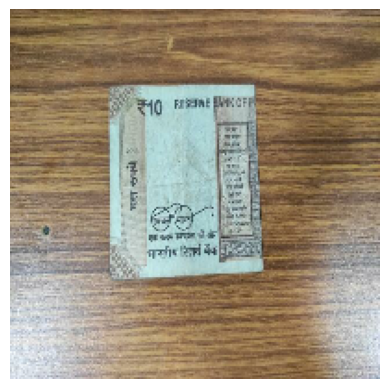

In [66]:
# Use the trained model to make predictions on the captured image
prediction_2 = model.predict(test_image_2)
predicted_class_2 = int(round(prediction_2[0][0]))

# Get the predicted class label or classify as "Wrong Input"
if predicted_class_2 in classes:
    predicted_label_2 = classes[predicted_class_2]
    confidence_2 = prediction_2[0][0]
    if confidence_2 < confidence_threshold_1:
        predicted_label_2 = "Wrong Input"
else:
    predicted_label_2 = "Wrong Input"

# Print the predicted class label
print("Predicted Class:", predicted_label_2)
print("Confidence Ratio:", confidence_2)
# Display the captured image
plt.imshow(cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 233ms/step
Predicted Class Label: 10
Confidence Ratio: 0.7310103


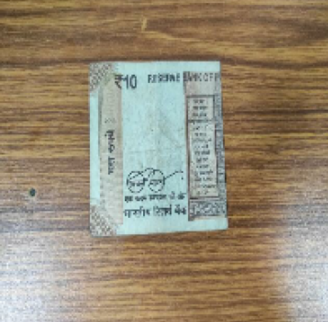

In [72]:
# Path to the input image on your phone
input_image_path = 'Screenshot (797).png'

# Resize the input image to the desired dimensions
image_height = 200
image_width = 200
image_channels = 3

# Load the input image
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Failed to load the image.")
else:
    # Resize the image
    resized_image = cv2.resize(input_image, (image_width, image_height))

    # Perform further processing on the resized image
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the image
    processed_image = resized_image.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0

    # Make predictions on the input image
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label = class_labels[predicted_class_index]

    # Calculate the confidence ratio from predictions
    confidence_ratio = sp.softmax(predictions[0])[predicted_class_index]
    if confidence_ratio < 0.7:
        predicted_class_label = "Wrong Input"
    # Print the predicted class label and confidence ratio
    print("Predicted Class Label:", predicted_class_label)
    print("Confidence Ratio:", confidence_ratio)

    # Display the input image
    display(Image(filename=input_image_path))


1/1 [==============================] - 0s 136ms/step
Predicted Class Label: Wrong Input
Confidence Ratio: 0.7308115


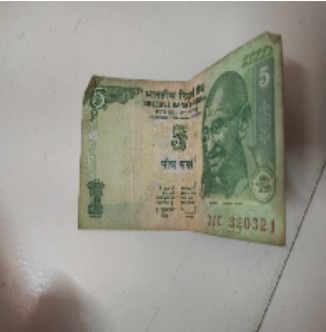

In [43]:
# Path to the input image on your phone
input_image_path = 'Screenshot (792).png'

# Resize the input image to the desired dimensions
image_height = 200
image_width = 200
image_channels = 3



# Load the input image
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Failed to load the image.")
else:
    # Resize the image
    resized_image = cv2.resize(input_image, (image_width, image_height))

    # Perform further processing on the resized image
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the image
    processed_image = resized_image.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0

    # Make predictions on the input image
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label = class_labels[predicted_class_index]

    # Calculate the confidence ratio from predictions
    confidence_ratio = sp.softmax(predictions[0])[predicted_class_index]
    if confidence_ratio < 0.75:
        predicted_class_label = "Wrong Input"
    # Print the predicted class label and confidence ratio
    print("Predicted Class Label:", predicted_class_label)
    print("Confidence Ratio:", confidence_ratio)

    # Display the input image
    display(Image(filename=input_image_path))


In [108]:
# Capture and preprocess the image
ret, frame_3 = cap.read()

1/1 [==============================] - 0s 159ms/step
Predicted Class Label: Wrong Input
Confidence Ratio: 0.7310583


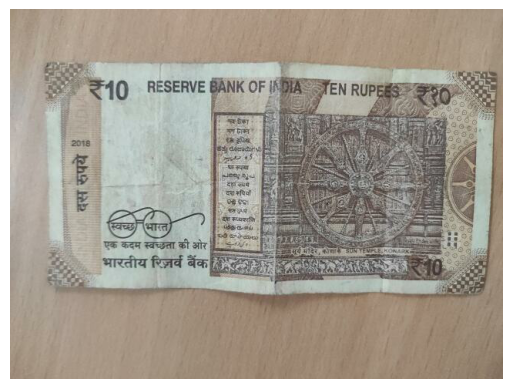

In [107]:
if not ret:
    print("Error: Failed to capture image from the camera.")
else:
    # Resize the captured frame to the desired dimensions
    resized_frame_3 = cv2.resize(frame_3, (image_width, image_height))

    # Perform further processing on the resized frame
    image_channels = 3  # Assuming RGB image, change accordingly if using grayscale

    # Reshape and normalize the frame
    processed_frame_3 = resized_frame_3.reshape(1, image_height, image_width, image_channels).astype('float32') / 255.0

    # Make predictions on the input frame
    predictions_3 = model.predict(processed_frame_3)
    predicted_class_index_3 = np.argmax(predictions_3[0])
    class_labels = {0: '10', 1: '20'}
    predicted_class_label_3 = class_labels[predicted_class_index_3]

    # Calculate the confidence ratio from predictions
    confidence_ratio_3 = sp.softmax(predictions_3[0])[predicted_class_index_3]

    # Check the confidentiality ratio and classify as "Wrong Input" if below 0.9
    if confidence_ratio_3 < 0.8:
        predicted_class_label_3 = "Wrong Input"

    # Print the predicted class label and confidence ratio
    print("Predicted Class Label:", predicted_class_label_3)
    print("Confidence Ratio:", confidence_ratio_3)

    # Display the captured frame
plt.imshow(cv2.cvtColor(frame_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [67]:
# Read the captured image
image = cv2.imread("Screenshot (794).png")

In [114]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum and maximum area thresholds to filter out contours
min_area_threshold = 1000
max_area_threshold = 5000

# Iterate over the contours and count the number of 20 rupee notes
count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if min_area_threshold < area < max_area_threshold:
        count += 1
print("Number of 20 rupee notes:", count)


Number of 20 rupee notes: 2


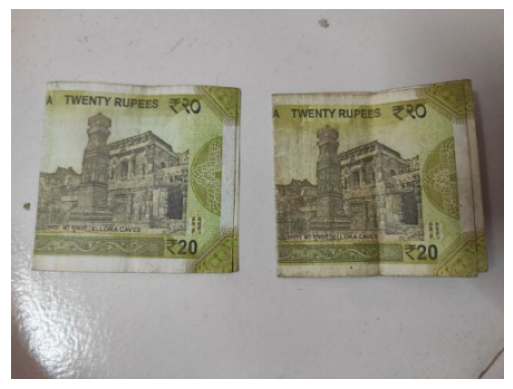

In [115]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 121ms/step
confidence ratio 0.54714674


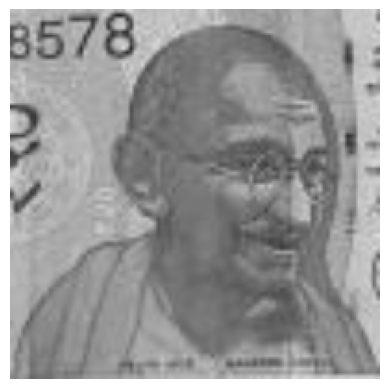

1/1 [==============================] - 0s 106ms/step
confidence ratio 0.627311


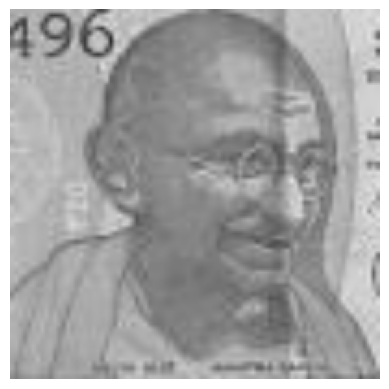

1/1 [==============================] - 0s 151ms/step
confidence ratio 0.52284706


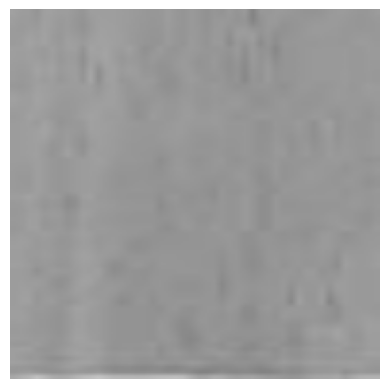

1/1 [==============================] - 0s 111ms/step
confidence ratio 0.5489282


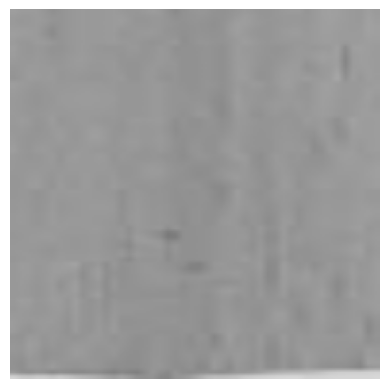

Number of valid 20 rupee notes: 4


In [112]:
# Convert the image to grayscale
gray = cv2.cvtColor(frame_3, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum and maximum area thresholds to filter out contours
min_area_threshold = 1000
max_area_threshold = 5000

# Define the confidence threshold for classifying predictions
confidence_threshold = 0.5

# Initialize the count for valid 20 rupee notes
valid_count = 0

# Iterate over the contours and classify each one
for contour in contours:
    area = cv2.contourArea(contour)
    if min_area_threshold < area < max_area_threshold:
        # Extract the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Extract the ROI (Region of Interest) from the grayscale image
        roi = gray[y:y+h, x:x+w]
        
        # Resize the ROI to the desired dimensions
        resized_roi = cv2.resize(roi, (200, 200))
        
        # Convert the resized ROI to 3-channel image
        resized_roi = cv2.cvtColor(resized_roi, cv2.COLOR_GRAY2BGR)
        
        # Preprocess the resized ROI for prediction
        processed_roi = resized_roi.reshape(1, 200, 200, 3).astype('float32') / 255.0
        
        # Make the prediction using the trained model
        predictions = model.predict(processed_roi)
        predicted_class_index = np.argmax(predictions[0])
        class_labels = {0: '10', 1: '20'}
        predicted_class_label = class_labels[predicted_class_index]
        
        # Calculate the confidence ratio from predictions
        confidence_ratio = sp.softmax(predictions[0])[predicted_class_index]
        print("confidence ratio",confidence_ratio)
        # Check if the predicted class is valid based on confidence ratio
        if confidence_ratio >= confidence_threshold:
            valid_count += 1
            # Display the counted image
            plt.imshow(resized_roi)
            plt.axis('off')
            plt.show()
# Print the number of valid 20 rupee notes
print("Number of valid 20 rupee notes:", valid_count)


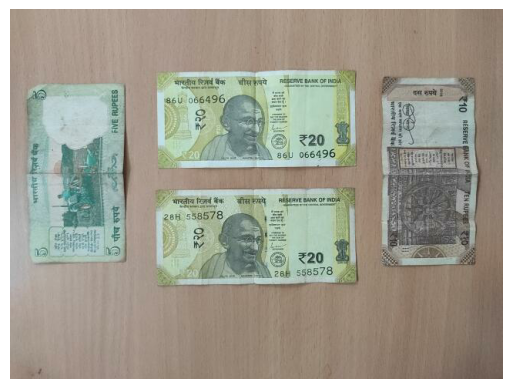

In [110]:
plt.imshow(cv2.cvtColor(frame_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 135ms/step
Confidence ratio: 0.54714674


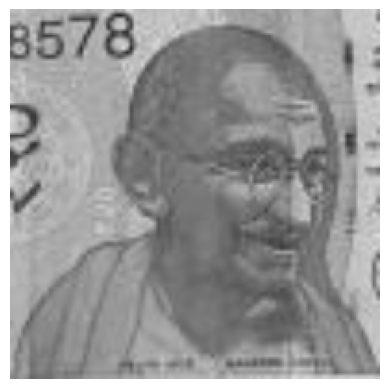

1/1 [==============================] - 0s 143ms/step
Confidence ratio: 0.627311


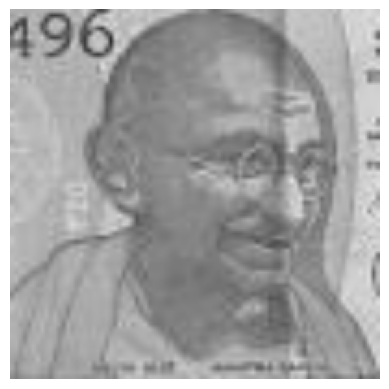

1/1 [==============================] - 0s 387ms/step
Confidence ratio: 0.52284706


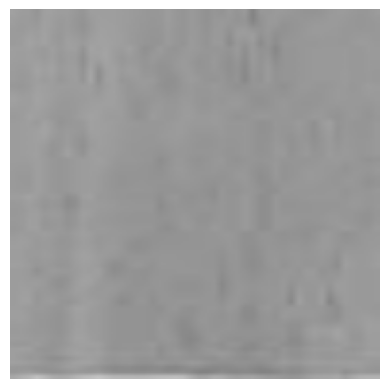

1/1 [==============================] - 0s 107ms/step
Confidence ratio: 0.5489282


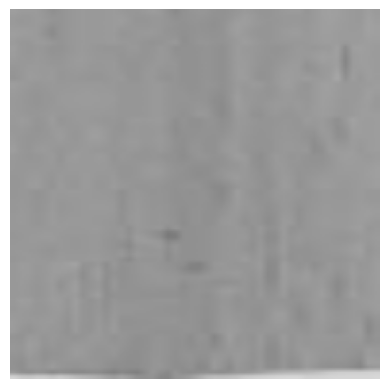

Number of valid 20 rupee notes: 4


In [119]:
# Convert the image to grayscale
gray = cv2.cvtColor(frame_3, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum and maximum area thresholds to filter out contours
min_area_threshold = 1000
max_area_threshold = 5000

# Define the confidence threshold for classifying predictions
confidence_threshold = 0.5

# Initialize the count for valid 20 rupee notes
valid_count = 0

# Iterate over the contours and classify each one
for contour in contours:
    area = cv2.contourArea(contour)
    if min_area_threshold < area < max_area_threshold:
        # Extract the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Extract the ROI (Region of Interest) from the grayscale image
        roi = gray[y:y+h, x:x+w]
        
        # Resize the ROI to the desired dimensions
        resized_roi = cv2.resize(roi, (200, 200))
        
        # Convert the resized ROI to 3-channel image
        resized_roi = cv2.cvtColor(resized_roi, cv2.COLOR_GRAY2BGR)
        
        # Preprocess the resized ROI for prediction
        processed_roi = np.expand_dims(resized_roi, axis=0)
        processed_roi = processed_roi.astype('float32') / 255.0
        
        # Make sure the input shape matches the expected shape of the model
        processed_roi = processed_roi.reshape(1, 200, 200, 3)
        
        # Make the prediction using the trained model
        predictions = model.predict(processed_roi)
        predicted_class_index = np.argmax(predictions[0])
        class_labels = {0: '10', 1: '20'}
        predicted_class_label = class_labels[predicted_class_index]
        
        # Calculate the confidence ratio from predictions
        confidence_ratio = sp.softmax(predictions[0])[predicted_class_index]
        print("Confidence ratio:", confidence_ratio)
        
        # Check if the predicted class is valid based on confidence ratio
        if confidence_ratio >= confidence_threshold:
            valid_count += 1
            
            # Display the counted image
            plt.imshow(cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

# Print the number of valid 20 rupee notes
print("Number of valid 20 rupee notes:", valid_count)
